# Quantum States (15 mins)

The general state of a qubit ($|q\rangle$) is:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

(The second line tells us $\alpha$ and $\beta$ are complex numbers). The first two implications tell us that we cannot differentiate between some of these states. This means we can be more specific in our description of the qubit. 

Firstly, since we cannot measure global phase, we can only measure the difference in phase between the states $|0\rangle$ and $|1\rangle$. Instead of having $\alpha$ and $\beta$ be complex, we can confine them to the real numbers and add a term to tell us the relative phase between them:

$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Finally, since the qubit state must be normalised, i.e.

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

we can use the trigonometric identity:

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

to describe the real $\alpha$ and $\beta$ in terms of one variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

From this we can describe the state of any qubit using the two variables $\phi$ and $\theta$:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

We want to plot our general qubit state:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

If we interpret $\theta$ and $\phi$ as spherical co-ordinates ($r = 1$, since the magnitude of the qubit state is $1$), we can plot any single qubit state on the surface of a sphere, known as the _Bloch sphere._

Below we have plotted a qubit in the state $|{+}\rangle$. In this case, $\theta = \pi/2$ and $\phi = 0$.

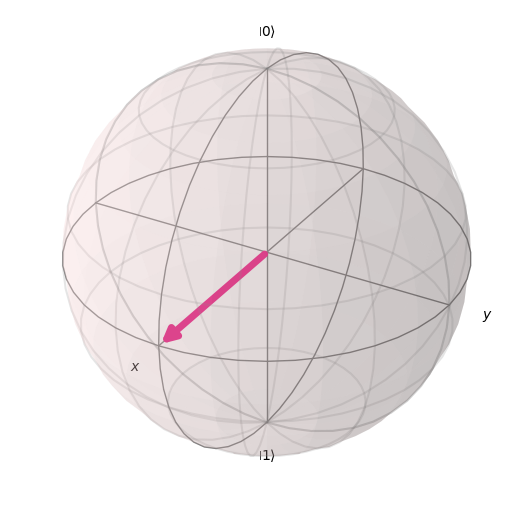

In [1]:
## Introduce qiskit quantum state
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.quantum_info import Statevector
from math import sqrt, pi

coords = [1, pi/2,0] # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')


# Quantum Gates

## 1. The Pauli Gates
You should be familiar with the Pauli matrices from the linear algebra section. If any of the maths here is new to you, you should use the linear algebra section to bring yourself up to speed. We will see here that the Pauli matrices can represent some very commonly used quantum gates.

### 1.1 The X-Gate
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$

### 1.2 The Y & Z-gates
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by [[$\pi$|$2\pi$|$\frac{\pi}{2}$]] around the y and z-axis of the Bloch sphere.

Below is a widget that displays a qubit’s state on the Bloch sphere, pressing one of the buttons will perform the gate on the qubit:

## 2. The Hadamard Gate

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

## 3. The S-gates

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate), this is a P-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  The S<sup>†</sup>-gate is clearly an P-gate with $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

This notation is common throughout quantum computing.

## 4. The U-gate

As we saw earlier, the I, Z, S & T-gates were all special cases of the more general P-gate. In the same way, the U-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

Every gate in this chapter could be specified as $U(\theta,\phi,\lambda)$, but it is unusual to see this in a circuit diagram, possibly due to the difficulty in reading this.

As an example, we see some specific cases of the U-gate in which it is equivalent to the H-gate and P-gate respectively.

$$
\begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P
\end{aligned}
$$

## 5. CNOT gates
When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$ (behaving as classical bits), this gate is very simple and intuitive to understand. We can use the classical truth table:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

And acting on our 4D-statevector, it has one of the two matrices:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

depending on which qubit is the control and which is the target. Different books, simulators and papers order their qubits differently. In our case, the left matrix corresponds to the CNOT in the circuit above. This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+\rangle$:

# Quantum Circuits (15 mins)
## 1. Bell State Generation


In [2]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization import array_to_latex
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [3]:
# Let's see the result:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, prefix="\\text{Statevector = }")

/var/folders/34/x1_bcbdx43zg5k9twfhlbpj40000gn/T/ipykernel_37416/3025048111.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  final_state = svsim.run(qobj).result().get_statevector()


<IPython.core.display.Latex object>

This is known as a _Bell_ state. We can see that this state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. Most interestingly, it has a **0%** chance of being measured in the states $|01\rangle$ or $|10\rangle$. We can see this in Qiskit:

/var/folders/34/x1_bcbdx43zg5k9twfhlbpj40000gn/T/ipykernel_37416/163333908.py:1: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = svsim.run(qobj).result()


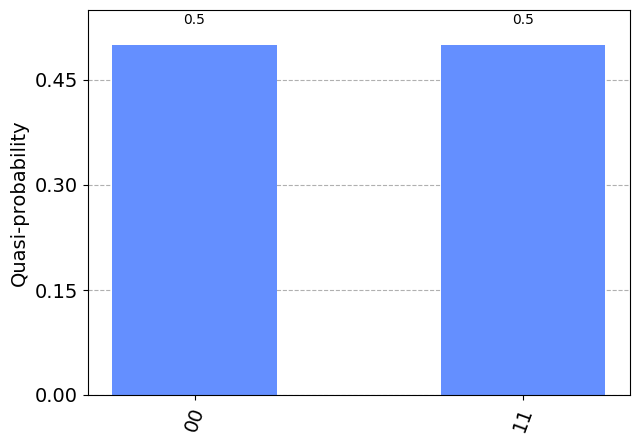

In [4]:
result = svsim.run(qobj).result()
plot_histogram(result.get_counts())

## 2. Teleportation (Under Construction)

## 3. Variational Quantum Circuits

# Measurement (15 mins)
## 1. Retrieve Statistical Distribution from the State

## 2. Obtain Expectation Values